In [516]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [517]:
import os
from pathlib import Path
import torch, numpy as np, pandas as pd

In [518]:
df = pd.read_csv("/content/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [519]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [520]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [521]:
test = pd.read_csv("/content/test.csv")
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [522]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [523]:
modes = df.mode().iloc[0]
modes

PassengerId                      1
Survived                       0.0
Pclass                         3.0
Name           Abbing, Mr. Anthony
Sex                           male
Age                           24.0
SibSp                          0.0
Parch                          0.0
Ticket                        1601
Fare                          8.05
Cabin                      B96 B98
Embarked                         S
Name: 0, dtype: object

In [524]:
df.fillna(modes, inplace=True)

In [525]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [526]:
df.describe(include=(np.number))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

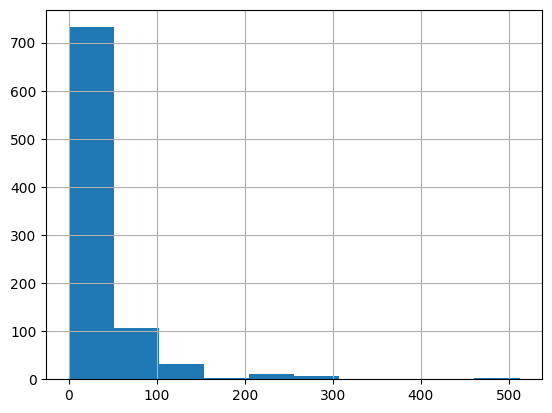

In [527]:
df["Fare"].hist()

In [528]:
df["LogFare"] = np.log(df["Fare"]+1)

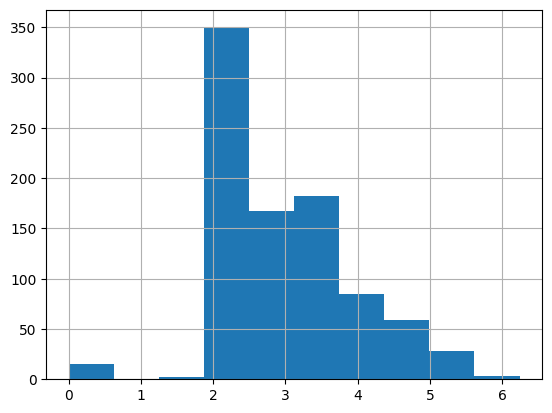

In [529]:
df["LogFare"].hist();

In [530]:
pclasses = sorted(df.Pclass.unique())
pclasses

[1, 2, 3]

In [531]:
df.describe(include=[object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,691,646


In [532]:
df = pd.get_dummies(df, columns=["Sex", "Pclass", "Embarked"])
df.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'LogFare', 'Sex_female', 'Sex_male', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [533]:
added_cols = ['Sex_male', 'Sex_female', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
df[added_cols].head()

,Sex_male,Sex_female,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,0,0,1,0,0,1
1,0,1,1,0,0,1,0,0
2,0,1,0,0,1,0,0,1
3,0,1,1,0,0,0,0,1
4,1,0,0,0,1,0,0,1


In [534]:
from torch import tensor

t_dep = tensor(df.Survived)

In [535]:
indep_cols = ["Age", "SibSp", "Parch", "LogFare"] + added_cols

t_indep = tensor(df[indep_cols].values, dtype=torch.float)
t_indep

tensor([[22.,  1.,  0.,  ...,  0.,  0.,  1.],
        [38.,  1.,  0.,  ...,  1.,  0.,  0.],
        [26.,  0.,  0.,  ...,  0.,  0.,  1.],
        ...,
        [24.,  1.,  2.,  ...,  0.,  0.,  1.],
        [26.,  0.,  0.,  ...,  1.,  0.,  0.],
        [32.,  0.,  0.,  ...,  0.,  1.,  0.]])

In [536]:
t_indep.shape

torch.Size([891, 12])

In [537]:
torch.manual_seed(42)

n_coeff = t_indep.shape[1]
coeffs = torch.rand(n_coeff)-0.5
coeffs

tensor([ 0.3823,  0.4150, -0.1171,  0.4593, -0.1096,  0.1009, -0.2434,  0.2936,
         0.4408, -0.3668,  0.4346,  0.0936])

In [538]:
n_coeff

12

In [539]:
t_indep*coeffs

tensor([[ 8.4099,  0.4150, -0.0000,  ..., -0.0000,  0.0000,  0.0936],
        [14.5262,  0.4150, -0.0000,  ..., -0.3668,  0.0000,  0.0000],
        [ 9.9390,  0.0000, -0.0000,  ..., -0.0000,  0.0000,  0.0936],
        ...,
        [ 9.1745,  0.4150, -0.2343,  ..., -0.0000,  0.0000,  0.0936],
        [ 9.9390,  0.0000, -0.0000,  ..., -0.3668,  0.0000,  0.0000],
        [12.2326,  0.0000, -0.0000,  ..., -0.0000,  0.4346,  0.0000]])

In [540]:
# Divide by max to keep the magnitude of age similar to the other features

vals, indices = t_indep.max(dim=0)
t_indep = t_indep / vals

In [541]:
indices

tensor([630, 159, 678, 258,   0,   1,   1,   9,   0,   1,   5,   0])

In [542]:
t_indep.shape

torch.Size([891, 12])

In [543]:
coeffs.shape

torch.Size([12])

In [544]:
t_indep*coeffs

tensor([[ 0.1051,  0.0519, -0.0000,  ..., -0.0000,  0.0000,  0.0936],
        [ 0.1816,  0.0519, -0.0000,  ..., -0.3668,  0.0000,  0.0000],
        [ 0.1242,  0.0000, -0.0000,  ..., -0.0000,  0.0000,  0.0936],
        ...,
        [ 0.1147,  0.0519, -0.0390,  ..., -0.0000,  0.0000,  0.0936],
        [ 0.1242,  0.0000, -0.0000,  ..., -0.3668,  0.0000,  0.0000],
        [ 0.1529,  0.0000, -0.0000,  ..., -0.0000,  0.4346,  0.0000]])

In [545]:
# Divide by max to keep similar magnitudes in the features
#vals, indices = t_indep.max(dim=0)
#t_indep = t_indep / vals

In [546]:
t_indep

tensor([[0.2750, 0.1250, 0.0000,  ..., 0.0000, 0.0000, 1.0000],
        [0.4750, 0.1250, 0.0000,  ..., 1.0000, 0.0000, 0.0000],
        [0.3250, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 1.0000],
        ...,
        [0.3000, 0.1250, 0.3333,  ..., 0.0000, 0.0000, 1.0000],
        [0.3250, 0.0000, 0.0000,  ..., 1.0000, 0.0000, 0.0000],
        [0.4000, 0.0000, 0.0000,  ..., 0.0000, 1.0000, 0.0000]])

In [547]:
t_indep* coeffs

tensor([[ 0.1051,  0.0519, -0.0000,  ..., -0.0000,  0.0000,  0.0936],
        [ 0.1816,  0.0519, -0.0000,  ..., -0.3668,  0.0000,  0.0000],
        [ 0.1242,  0.0000, -0.0000,  ..., -0.0000,  0.0000,  0.0936],
        ...,
        [ 0.1147,  0.0519, -0.0390,  ..., -0.0000,  0.0000,  0.0936],
        [ 0.1242,  0.0000, -0.0000,  ..., -0.3668,  0.0000,  0.0000],
        [ 0.1529,  0.0000, -0.0000,  ..., -0.0000,  0.4346,  0.0000]])

In [548]:
preds = (t_indep*coeffs).sum(axis=1)

In [549]:
len(preds)

891

In [550]:
preds[:10]

tensor([0.7371, 0.0391, 0.9206, 0.4639, 0.7542, 1.0459, 0.2906, 0.7982, 0.9089,
        0.3994])

In [551]:
loss = torch.abs(preds - t_dep).mean()
loss

tensor(0.6056)

In [552]:
def calc_preds(coeffs, indeps): return (indeps*coeffs).sum(axis=1)
def calc_loss(coeffs, indeps, deps): return torch.abs(calc_preds(coeffs, indeps)-deps).mean()

In [553]:
coeffs.requires_grad_()

tensor([ 0.3823,  0.4150, -0.1171,  0.4593, -0.1096,  0.1009, -0.2434,  0.2936,
         0.4408, -0.3668,  0.4346,  0.0936], requires_grad=True)

In [554]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss

tensor(0.6056, grad_fn=<MeanBackward0>)

In [555]:
loss.backward()

In [556]:
coeffs.grad

tensor([ 0.0883,  0.0272,  0.0056,  0.0608,  0.3423, -0.0853, -0.1324,  0.0202,
         0.3692, -0.0786,  0.0842,  0.2514])

In [557]:
with torch.no_grad():
    coeffs.sub_(coeffs.grad * 0.1)
    print(calc_loss(coeffs, t_indep, t_dep))

tensor(0.5696)


In [558]:
from fastai.data.transforms import RandomSplitter

trn_split, val_split = RandomSplitter(seed=42)(df)

In [559]:
trn_indep, val_indep = t_indep[trn_split], t_indep[val_split]
trn_dep, val_dep = t_dep[trn_split], t_dep[val_split]
len(trn_indep), len(val_indep)

(713, 178)

In [560]:
def update_coeffs(coeffs, lr): coeffs.sub_(coeffs.grad * lr)

In [561]:
def one_epoch(coeffs, lr):
    loss = calc_loss(coeffs, trn_indep, trn_dep)
    loss.backward()
    with torch.no_grad(): update_coeffs(coeffs, lr)
    print(f"{loss: .3f}", end="; ")

In [562]:
def init_coeffs(): return (torch.rand(n_coeff)-0.5).requires_grad_()

In [563]:
def train_model(epochs=30, lr=0.01):
    torch.manual_seed(42)
    coeffs = init_coeffs()
    for i in range(epochs): one_epoch(coeffs, lr=lr)
    return coeffs

In [564]:
coeffs = train_model(50, lr=0.1)

 0.603;  0.568;  0.502;  0.421;  0.429;  0.467;  0.419;  0.380;  0.402;  0.459;  0.541;  0.524;  0.488;  0.496;  0.530;  0.545;  0.517;  0.450;  0.353;  0.423;  0.481;  0.526;  0.538;  0.518;  0.485;  0.508;  0.602;  0.578;  0.458;  0.434;  0.440;  0.486;  0.520;  0.502;  0.415;  0.440;  0.530;  0.605;  0.620;  0.559;  0.441;  0.374;  0.428;  0.519;  0.554;  0.550;  0.510;  0.474;  0.537;  0.649; 

In [565]:
def show_coeffs(): return dict(zip(indep_cols, coeffs.requires_grad_(False)))
show_coeffs()

{'Age': tensor(-1.0259),
 'SibSp': tensor(-0.9782),
 'Parch': tensor(-0.3735),
 'LogFare': tensor(0.1001),
 'Sex_male': tensor(0.2907),
 'Sex_female': tensor(0.0643),
 'Pclass_1': tensor(0.4733),
 'Pclass_2': tensor(0.2056),
 'Pclass_3': tensor(0.1758),
 'Embarked_C': tensor(0.1013),
 'Embarked_Q': tensor(0.8253),
 'Embarked_S': tensor(-0.4017)}

In [566]:
preds = calc_preds(coeffs, val_indep)

In [567]:
results = val_dep.bool()==(preds>0.5)
results[:16]

tensor([ True, False,  True,  True,  True,  True, False, False,  True, False,
        False, False, False,  True,  True, False])

In [568]:
results.float().mean()

tensor(0.5674)

In [569]:
def acc(coeffs): return (val_dep.bool()==(calc_preds(coeffs, val_indep)>0.5)).float().mean()
acc(coeffs)

tensor(0.5674)

In [570]:
preds[:28]

tensor([ 0.8290,  1.0189,  0.2939, -0.0671, -0.1836, -0.4141,  0.2707, -0.4486,
        -0.6218, -0.1003, -0.3104,  0.1203, -0.1309,  0.7927, -0.3388, -0.1616,
        -0.4180, -0.4618, -0.3526, -0.5227, -0.2078, -0.3026,  0.0299, -0.9270,
        -0.1581,  0.9136, -0.3189, -0.3796])

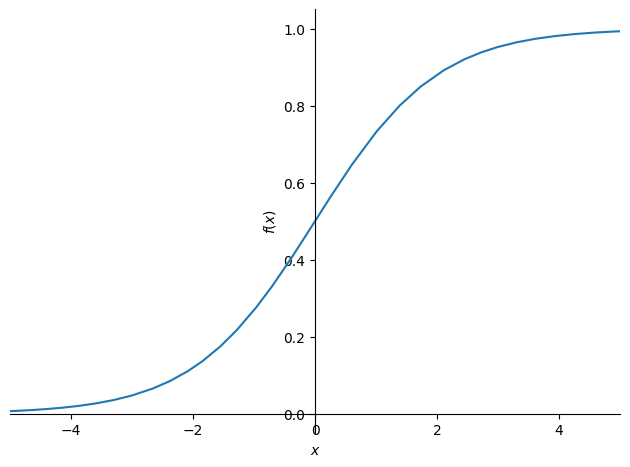

In [571]:
import sympy
sympy.plot("1/(1+exp(-x))", xlim=(-5,5));

In [572]:
def calc_preds(coeffs,indeps): return torch.sigmoid((indeps*coeffs).sum(axis=1))

In [573]:
coeffs = train_model(lr=3)

 0.546;  0.491;  0.381;  0.304;  0.276;  0.257;  0.238;  0.222;  0.211;  0.205;  0.202;  0.200;  0.199;  0.199;  0.199;  0.199;  0.198;  0.198;  0.197;  0.197;  0.196;  0.196;  0.195;  0.194;  0.194;  0.193;  0.193;  0.193;  0.193;  0.193; 

In [574]:
acc(coeffs)

tensor(0.8258)

In [575]:
show_coeffs()

{'Age': tensor(-1.9958),
 'SibSp': tensor(-1.3975),
 'Parch': tensor(-0.4462),
 'LogFare': tensor(2.4506),
 'Sex_male': tensor(-25.9439),
 'Sex_female': tensor(21.5868),
 'Pclass_1': tensor(9.1769),
 'Pclass_2': tensor(4.3398),
 'Pclass_3': tensor(-17.3741),
 'Embarked_C': tensor(3.4193),
 'Embarked_Q': tensor(1.1279),
 'Embarked_S': tensor(-8.7342)}

In [576]:
test["Fare"] = test.Fare.fillna(0)

In [577]:
test.fillna(modes, inplace=True)
test["LogFare"] = np.log(test["Fare"]+1)
test = pd.get_dummies(test, columns=["Sex","Pclass","Embarked"])

test_indep = tensor(test[indep_cols].values, dtype=torch.float)
test_indep = test_indep / vals

In [578]:
test["Survived"] = (calc_preds(test_indep, coeffs)>0.5).int()

In [579]:
sub_df = test[['PassengerId','Survived']]
sub_df.to_csv("submission.csv", index=False)

### Matrix Product

In [580]:
(val_indep*coeffs).sum(axis=1)

tensor([ 27.4733, -41.9377, -39.6698, -29.0947, -29.9258, -30.1475,   8.5056,
         17.5300, -51.5801,   8.0214, -51.9911, -39.6518, -51.4210,   5.5992,
        -52.1095, -25.3217, -25.8207,  17.7884, -30.0171,  -4.4035, -51.7928,
        -25.5962,  34.8134,  17.3165, -51.7322, -41.6973,  -3.8155, -25.7459,
        -51.5857,   5.5935,  17.6308,  -4.4236, -51.6680, -51.9482,  27.3236,
         -4.0547, -25.2774,  35.2542, -51.7860,  -4.4605, -29.8533, -51.7860,
        -30.1035,  35.0918, -51.6862,  -4.4611, -51.1099, -51.6446, -41.9748,
         -4.2419, -15.3149, -51.7796, -51.7586, -51.8570, -30.0279, -30.1776,
        -41.9372, -52.0231, -51.7112, -51.6484, -12.7772, -51.8319, -26.1486,
        -51.7167,  17.2141, -24.3873, -29.9008, -51.7589, -42.3363,  17.1197,
        -51.8427,   7.9792, -30.1527, -51.7277, -24.8068, -51.5986, -51.7860,
        -24.8526, -29.7761, -30.4222, -29.3385,  35.3496, -51.7678, -51.8224,
         16.9039, -17.6588, -12.1260,  23.2399,  29.7366, -29.87

In [581]:
def calc_preds(coeffs, indeps):return torch.sigmoid(indeps@coeffs)

In [582]:
def init_coeffs(): return (torch.rand(n_coeff, 1)*0.1).requires_grad_()

In [583]:
# None creates second dimension -- vector -> Matrix
trn_dep = trn_dep[:, None]
val_dep = val_dep[: , None]

In [584]:
coeffs = train_model(lr=2)

 0.516;  0.474;  0.397;  0.331;  0.298;  0.279;  0.263;  0.245;  0.229;  0.217;  0.210;  0.206;  0.203;  0.202;  0.202;  0.202;  0.202;  0.203;  0.203;  0.203;  0.203;  0.203;  0.202;  0.202;  0.201;  0.200;  0.199;  0.198;  0.197;  0.196; 

In [585]:
acc(coeffs)

tensor(0.8258)

### Neural Network

In [586]:
def init_coeffs(n_hidden=20):
    layer1 = (torch.rand(n_coeff, n_hidden)-0.5)/n_hidden
    layer2 = torch.rand(n_hidden, 1) - 0.3
    const = torch.rand(1)[0]
    return layer1.requires_grad_(), layer2.requires_grad_(), const.requires_grad_()

In [603]:
((torch.rand(n_coeff, 20)-0.5)/20).shape

torch.Size([12, 20])

In [587]:
torch.rand(20, 1) - 0.3

tensor([[ 0.5694],
        [ 0.2677],
        [ 0.4411],
        [ 0.1294],
        [ 0.5854],
        [ 0.2739],
        [-0.0334],
        [ 0.3274],
        [-0.0304],
        [ 0.1414],
        [-0.0031],
        [ 0.5317],
        [-0.1947],
        [-0.0305],
        [ 0.0588],
        [-0.1006],
        [ 0.2472],
        [-0.2938],
        [ 0.6516],
        [-0.2247]])

In [588]:
torch.rand(1)[0]

tensor(0.8860)

In [590]:
import torch.nn.functional as F

def calc_preds(coeffs, indeps):
    l1, l2, const = coeffs
    res = F.relu(indeps@l1)
    res = res@l2 + const
    return torch.sigmoid(res)


In [591]:
def update_coeffs(coeffs, lr):
    for layer in coeffs:
        layer.sub_(layer.grad * lr)
        layer.grad.zero_()

In [592]:
coeffs = train_model(lr=1.4)

 0.550;  0.543;  0.537;  0.529;  0.519;  0.506;  0.491;  0.472;  0.448;  0.419;  0.388;  0.358;  0.334;  0.316;  0.300;  0.287;  0.275;  0.265;  0.257;  0.251;  0.246;  0.241;  0.238;  0.235;  0.232;  0.230;  0.228;  0.226;  0.225;  0.223; 

In [593]:
coeffs = train_model(lr=20)

 0.550;  0.460;  0.327;  0.302;  0.326;  0.220;  0.201;  0.200;  0.203;  0.200;  0.197;  0.194;  0.193;  0.193;  0.193;  0.193;  0.193;  0.193;  0.193;  0.193;  0.193;  0.193;  0.193;  0.193;  0.193;  0.193;  0.193;  0.193;  0.193;  0.193; 

### Deep learning


In [594]:
def init_coeffs():
    hiddens = [10, 10]
    sizes = [n_coeff] + hiddens + [1]
    n = len(sizes)
    layers = [(torch.rand(sizes[i], sizes[i+1])-0.3)/sizes[i+1]*4 for i in range(n-1)]
    consts = [(torch.rand(1)[0]-0.5)*0.1 for i in range(n-1)]
    for l in layers+consts: l.requires_grad_()
    return layers, consts

In [595]:
hiddens = [10, 10]
sizes = [n_coeff] + hiddens + [1]
sizes

[12, 10, 10, 1]

In [596]:
n = len(sizes)
n

4

In [606]:
[(torch.rand(sizes[i], sizes[i+1])-0.3)/sizes[i+1]*4 for i in range(n-1)]

[tensor([[-0.0319,  0.0246, -0.0149, -0.0238,  0.1608,  0.1140,  0.0160, -0.0754,
           0.0170, -0.0044],
         [ 0.0149, -0.1004,  0.1231, -0.0669, -0.0758, -0.0834,  0.1635, -0.0404,
          -0.0026,  0.2368],
         [ 0.1862,  0.1947, -0.1099, -0.0634,  0.0045,  0.2452,  0.1005, -0.0696,
           0.0813, -0.0753],
         [ 0.0362,  0.0250,  0.2531,  0.1419,  0.0451,  0.1138,  0.0223,  0.1586,
           0.1591,  0.1337],
         [ 0.0020,  0.2506,  0.0511,  0.0021,  0.2053,  0.2430,  0.2790,  0.1393,
           0.0118,  0.1816],
         [ 0.2516, -0.1162,  0.0552, -0.0564,  0.1173,  0.1627,  0.0387,  0.0633,
           0.1700,  0.0464],
         [-0.0880,  0.2400, -0.0207,  0.0580,  0.0989,  0.0680, -0.1081,  0.1718,
          -0.0108, -0.0237],
         [ 0.1278, -0.0244, -0.0124,  0.0126,  0.0049, -0.0035,  0.0261,  0.1320,
          -0.0818, -0.0411],
         [ 0.0829,  0.1078,  0.1905, -0.0605,  0.1438,  0.1937,  0.1911, -0.1063,
           0.0037, -0.0919],
 

In [598]:
def calc_preds(coeffs, indeps):
    layers, consts = coeffs
    n = len(layers)
    res = indeps
    for i, l in enumerate(layers):
        res = res@l + consts[i]
        if i !=n-1: res = F.relu(res)
    return torch.sigmoid(res)

In [599]:
def update_coeffs(coeffs, lr):
    layers, consts = coeffs
    for layer in layers+consts:
        layer.sub_(layer.grad * lr)
        layer.grad.zero_()

In [600]:
coeffs = train_model(lr=4)

 0.548;  0.489;  0.475;  0.462;  0.450;  0.440;  0.432;  0.426;  0.420;  0.416;  0.412;  0.409;  0.406;  0.404;  0.402;  0.400;  0.399;  0.397;  0.396;  0.395;  0.394;  0.393;  0.393;  0.392;  0.391;  0.391;  0.390;  0.390;  0.389;  0.389; 

In [601]:
len(coeffs)

2

In [602]:
acc(coeffs)

tensor(0.5955)